## Desciption

Here, we are training a model to predict both the transcription initiation rate and the direction of transcription (forward or reverse). This model uses the same architecture as CNN_5_0, but uses augmented data that includes reversed complements.

This model predicts between -1 (reverse) and 1 (forward) with 0 being no transcription. It also uses CNN_6's preprocessing, where 1 is high TX, so -1 is highy TX (reversed) and 1 is highy TX (forward).

In [1]:
import IsActive_1_0 as parent

In [2]:
name = 'IsActive_1_0'

In [3]:
import pandas as pd

file_path = '../Data/Urtecho_2023/Urtecho_2023.csv'

df = pd.read_csv(file_path)

In [4]:
# Displays only the first and last row
df.iloc[[0, -1]]

,promoter_sequence,expn_med_fitted_scaled,log_expn_med_fitted_scaled,active
0,TCCCGTGCTATGTTATTGACACACAAAAGCGTTGAGGAACAGTGAG...,0.467135,0.082044,0
45200,TGAATCACATCGCGCGCCCCGCGTGAGGCACCAAACAAGGCCTCTG...,0.125388,0.056093,0


In [5]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [6]:
X_train, X_val, y_train, y_val = parent.train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = parent.train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((36160, 150, 4), (4521, 150, 4), (4520, 150, 4), (36160,), (4521,), (4520,))

In [ ]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_val, y_val)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 247/1130 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.3755

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


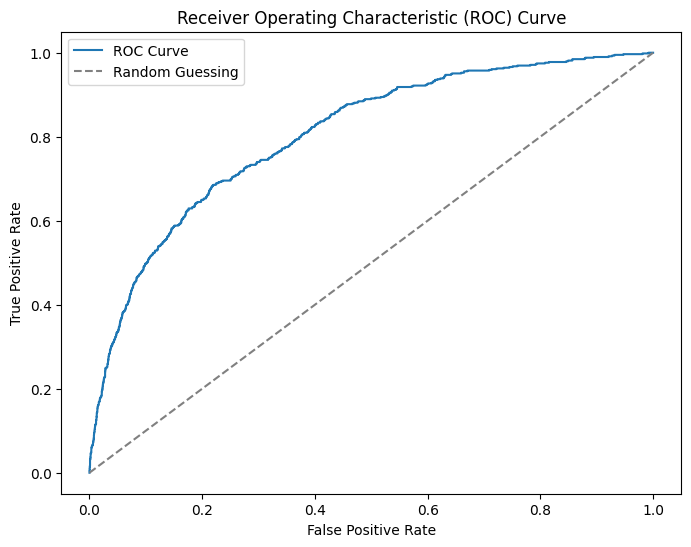

In [8]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_roc_curve(observed, parent.ravel(predicted))

In [10]:
for metric, value in loss.items():
    print(f"{metric}: {value:.4f}")

accuracy: 0.8759
precision: 0.5652
recall: 0.1990
f1_score: 0.2943
auc: 0.8041


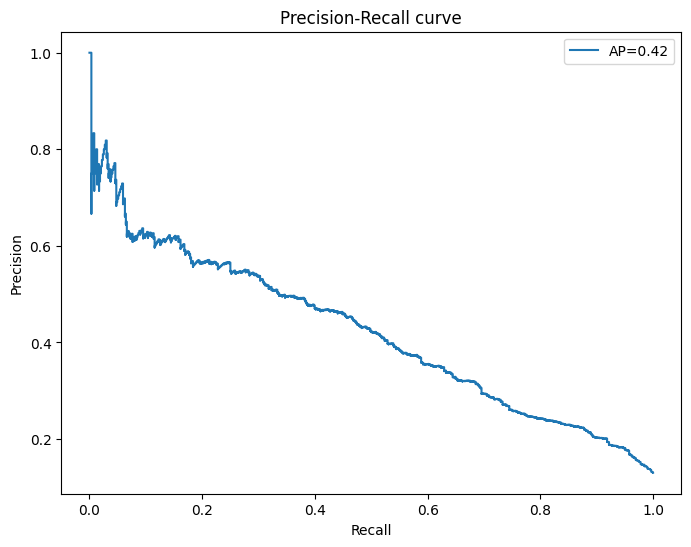

In [9]:
# make precision–recall curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score

# Compute precision and recall
precision, recall, _ = precision_recall_curve(observed, predicted)
average_precision = average_precision_score(observed, predicted)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [13]:
# count how many promoters are active 0/1
active_count = df['active'].value_counts()
print("Active count (0/1):")
print(active_count)

print("Percentage of inactive promoters:")
print(f"{active_count[0] / len(df) * 100:.2f}%")

Active count (0/1):
active
0    39514
1     5687
Name: count, dtype: int64
Percentage of inactive promoters:
87.42%
